# 05. forecast(시계열 분석)

## 1. 배경 및 설치

- install
    - 윈도우 유저는 Visual C++ Build Tool 을 먼저 설치
        - https://visualstudio.microsoft.com/visual-cpp-build-tools/
        - 위 경로 URL이 error 날 경우 : https://www.microsoft.com/ko-KR/download/details.aspx?id=48159
    - conda install pandas-datareader
    - conda install -c conda-forge fbprophet
    - pip install fbprophet
    - 참고 : https://stackoverflow.com/questions/53178281/installing-fbprophet-python-on-windows-10
    

In [4]:
from fbprophet import Prophet

---

## 함수(def)의 기초

In [3]:
def test_def(a,b):
    return a + b

- 가장 기초적인 모양의 def 정의
- 이름(test_def)과 입력 인자(a,b)를 정해준다.
- 출력 return을 작성

$$ y = asin(2\pi ft + t_0) + b $$

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
def plot_sine_wave(amp, freq, end_time, sample_time, start_time, bias):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    time = np.arange(start_time, end_time, sample_time)
    result = amp * np.sin(2* np.pi * freq * time + start_time) + bias
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi)" + str(freq) + "*t+" + str(start_time) + ")+" + str(bias))
    plt.show()

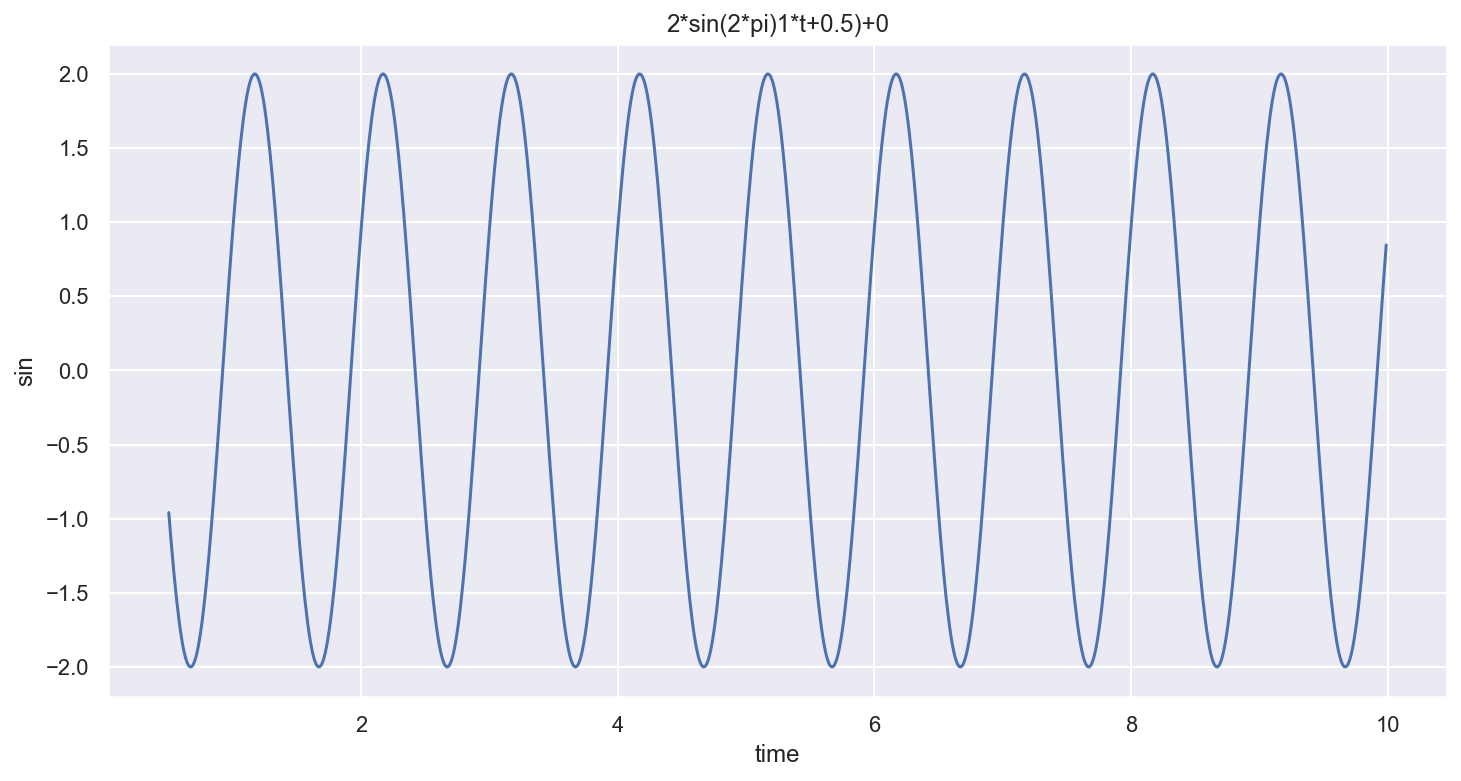

In [32]:
plot_sine_wave(2, 1, 10, 0.01, 0.5, 0)

In [33]:
def plot_sine_wave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    
    end_time = kwargs.get("end_time", 1)
    sample_time = kwargs.get("sample_time", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    start_time = kwargs.get("start_time", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(start_time, end_time, sample_time)
    result = amp * np.sin(2* np.pi * freq * time + start_time) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi)" + str(freq) + "*t+" + str(start_time) + ")+" + str(bias))
    plt.show()
    
    

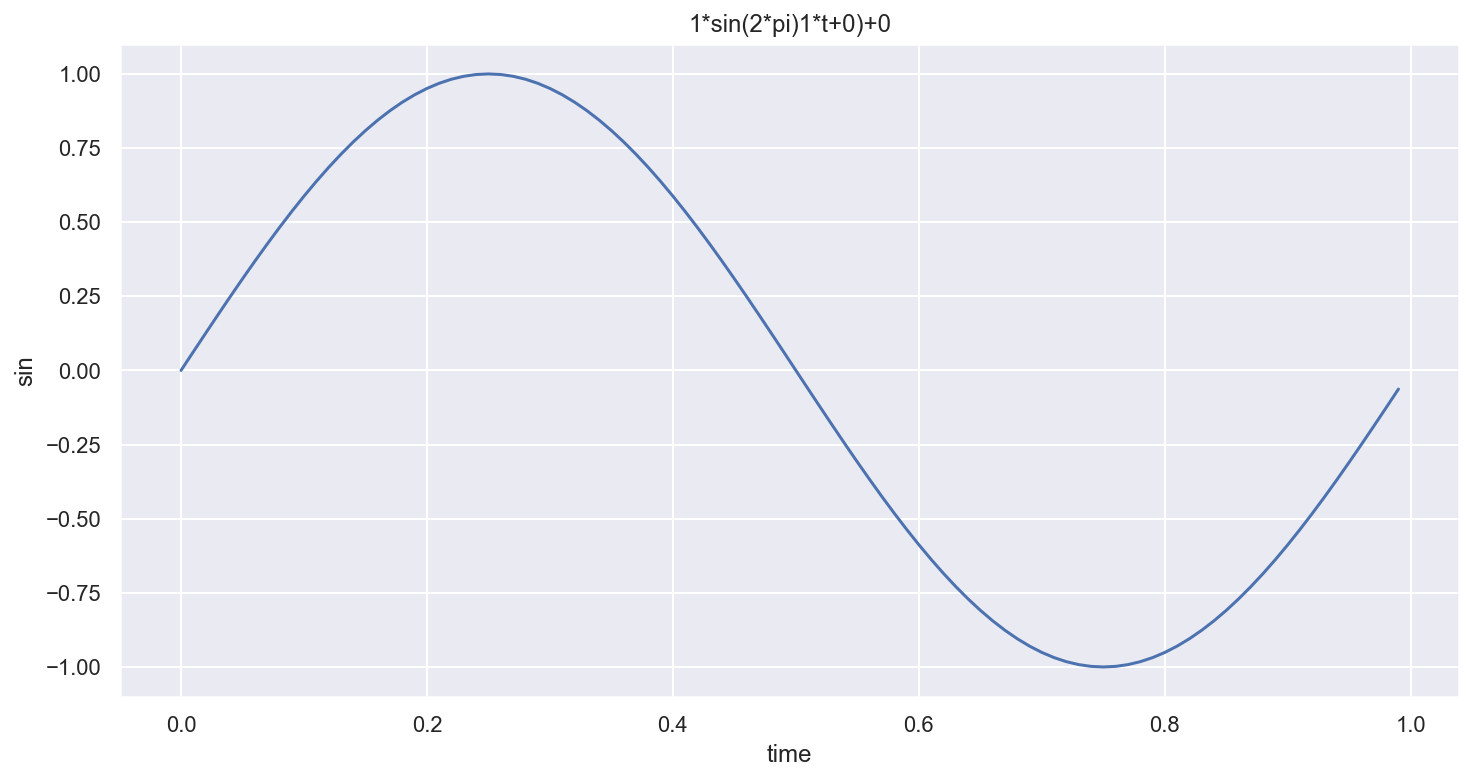

In [34]:
plot_sine_wave()

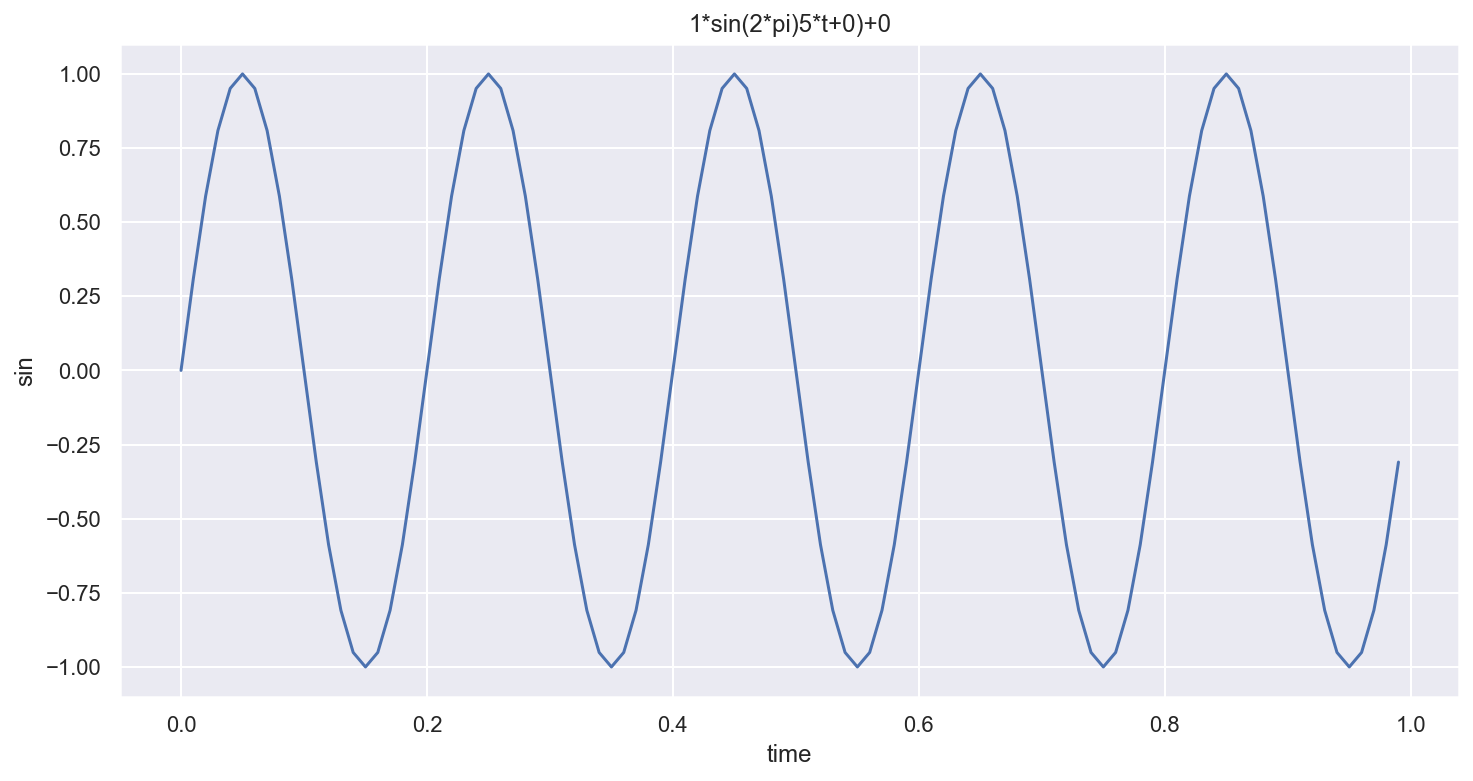

In [36]:
plot_sine_wave(freq=5)

In [40]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("This is MAC")
    rc("font", family="AppleGothic")
elif platform.system() == "Windows":
    print("This is Windows")
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system.")
    
plt.rcParams["axes.unicode_minus"] = False

This is Windows


## 내가 만든 함수 import 
- draw_sin_wave.py

In [4]:
! dir

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A479-D011

 D:\공부\프로젝트\네카라쿠배 - 데이터사이언스 1기\nekalakubae_data_science_1st\ds_study\code 디렉터리

2021-10-11  오전 12:49    <DIR>          .
2021-10-11  오전 12:49    <DIR>          ..
2021-10-10  오후 10:49    <DIR>          .ipynb_checkpoints
2021-09-30  오후 10:31         1,082,859 01. Analysis Seoul CCTV.ipynb
2021-10-06  오후 10:00         2,060,943 02. Analysis Seoul Crime.ipynb
2021-09-11  오전 09:50       106,266,277 02. Analysis Seoul Crime.pdf
2021-10-06  오후 10:00         1,082,859 03. 4주차 주간 시험(quiz 03)-제출용
2021-10-01  오후 06:47           313,481 03. Naver Movie Ranking.ipynb
2021-10-04  오후 05:38           336,662 03. Web Data.ipynb
2021-10-07  오후 05:56           235,339 04. Oil Price Analysis and Green construnction.ipynb
2021-10-04  오후 05:44            73,167 04. Selenium_Basic_1.ipynb
2021-10-04  오후 11:41             1,485 04. Selenium_Basic_2-2.py
2021-10-04  오후 11:23            45,093 04. Selenium_Basic_2.ipynb
2021-10-05  오후 10:13            38,318 04. S

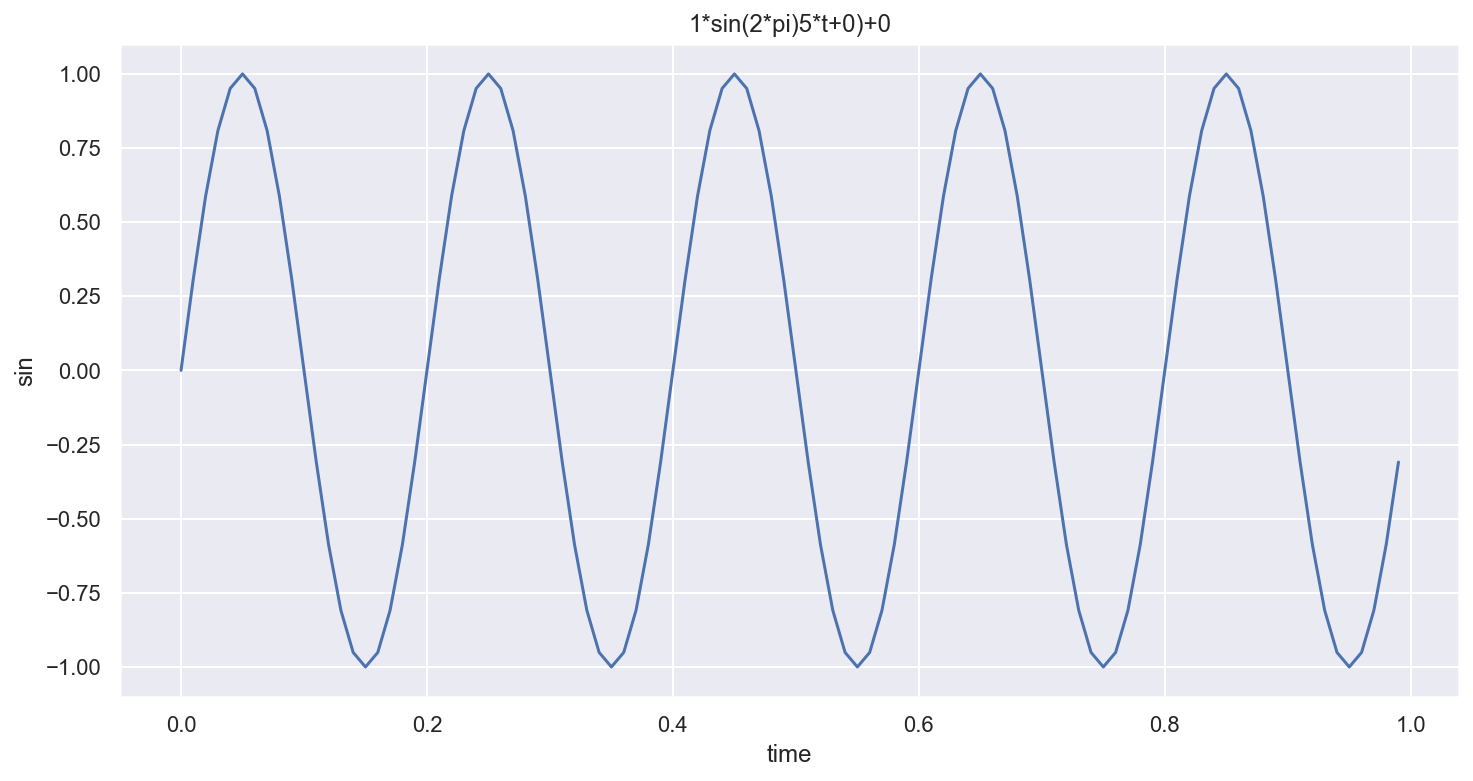

In [7]:
import plot_sin_wave as psw

psw.plot_sine_wave(freq=5)

In [40]:
%%writefile ./show_plot_sine_wave.py

import matplotlib.pyplot as plt
import numpy as np


def plot_sine_wave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    
    end_time = kwargs.get("end_time", 1)
    sample_time = kwargs.get("sample_time", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    start_time = kwargs.get("start_time", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(start_time, end_time, sample_time)
    result = amp * np.sin(2* np.pi * freq * time + start_time) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi)" + str(freq) + "*t+" + str(start_time) + ")+" + str(bias) + "한글테스트")
    plt.show()
    
if __name__ == "__main__":
    plot_sine_wave()

Overwriting ./show_plot_sine_wave.py


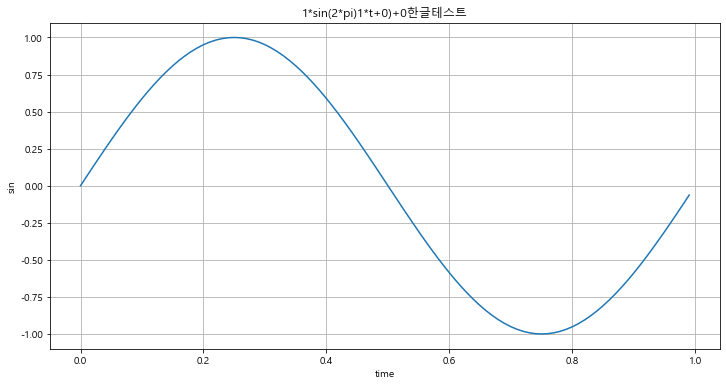

In [3]:
import show_plot_sine_wave

show_plot_sine_wave.plot_sine_wave()

In [27]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Set Hangul of Darwin")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    print("Set Hangul of Windows")
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. Error Hangul")
    
plt.rcParams["axes.unicode_minus"] = False

Writing ./set_matplotlib_hangul.py


In [2]:
import set_matplotlib_hangul

Set Hangul of Windows


---

## 2. Fbprophet 기초
- fbprophet 참고 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
time = np.linspace(0, 1, 365*2)
print("len(time) :", len(time))
result = np.sin(2*np.pi*12*time)
print("len(result) :", len(result))
ds = pd.date_range("2018-01-01", periods=len(time), freq="D")
print("len(ds) :", len(ds))
df = pd.DataFrame({
    "ds":ds,
    "y":result
})

len(time) : 730
len(result) : 730
len(ds) : 730


In [5]:
df.tail()

,ds,y
725,2019-12-27,-4.020070e-01
726,2019-12-28,-3.053260e-01
727,2019-12-29,-2.053818e-01
728,2019-12-30,-1.032426e-01
729,2019-12-31,-2.939152e-15


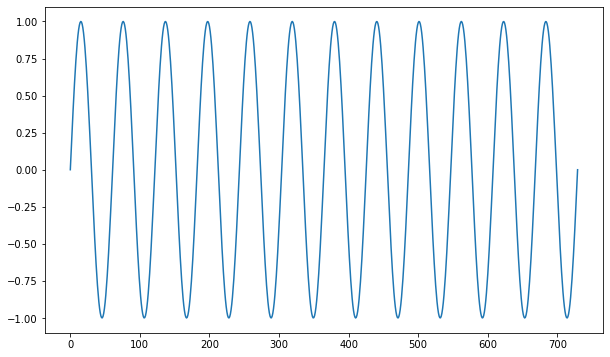

In [7]:
df["y"].plot(figsize=(10,6));

In [87]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
print("m :",m)
m.fit(df);

m : <fbprophet.forecaster.Prophet object at 0x000002778B0786A0>


In [91]:
future = m.make_future_dataframe(periods=60)
print("len(future) :", len(future))
forecast = m.predict(future)
print("forecast :", forecast)

len(future) : 790
forecast :             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2018-01-01 -0.000828    0.035467    0.103958    -0.000828    -0.000828   
1   2018-01-02 -0.000803    0.134442    0.206748    -0.000803    -0.000803   
2   2018-01-03 -0.000778    0.234245    0.305009    -0.000778    -0.000778   
3   2018-01-04 -0.000754    0.330424    0.400101    -0.000754    -0.000754   
4   2018-01-05 -0.000729    0.420827    0.490256    -0.000729    -0.000729   
..         ...       ...         ...         ...          ...          ...   
785 2020-02-25  0.009409   -0.602089   -0.530006     0.009202     0.009637   
786 2020-02-26  0.009437   -0.514102   -0.442768     0.009227     0.009674   
787 2020-02-27  0.009465   -0.420546   -0.349377     0.009250     0.009708   
788 2020-02-28  0.009493   -0.323172   -0.251717     0.009273     0.009738   
789 2020-02-29  0.009521   -0.221803   -0.150993     0.009296     0.009775   

     additive_terms  additive_term

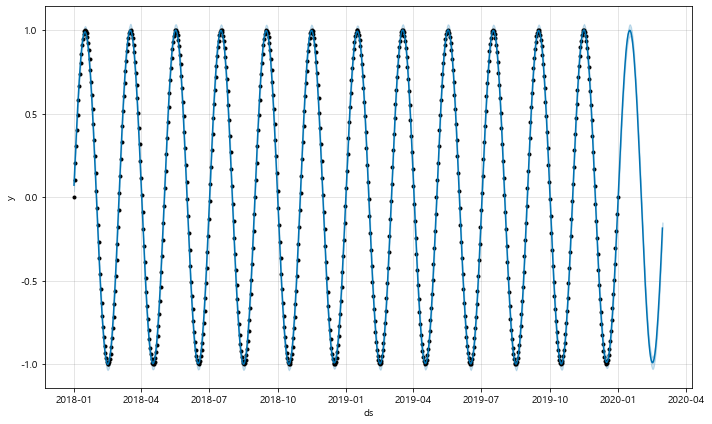

In [92]:
m.plot(forecast);

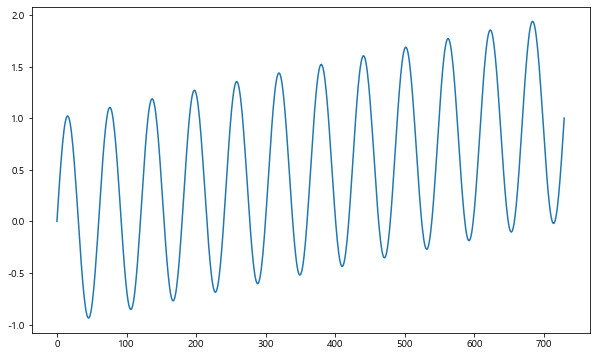

In [93]:
time = np.linspace(0, 1, 365*2)

result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range("2018-01-01", periods=len(time), freq="D")

df = pd.DataFrame({
    "ds":ds,
    "y":result
})

df["y"].plot(figsize=(10,6));

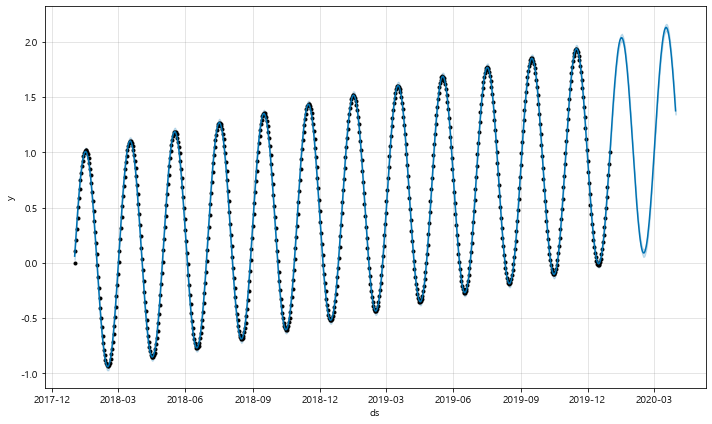

In [94]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=90)
forcast = m.predict(future)

m.plot(forcast);

In [33]:
np.random.randn(10)

array([-0.67195041, -0.22339554, -0.98298946, -0.99990161, -1.45435309,
       -0.06808424, -0.78608883, -0.49099091, -0.2498394 , -1.21781192])

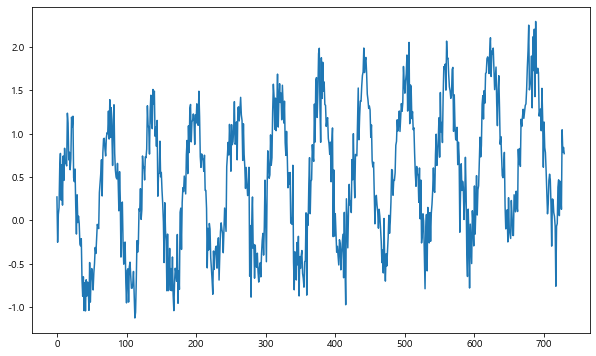

In [95]:
time = np.linspace(0, 1, 365*2)

result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range("2018-01-01", periods=len(time), freq="D")

df = pd.DataFrame({
    "ds":ds,
    "y":result
})

df["y"].plot(figsize=(10,6));

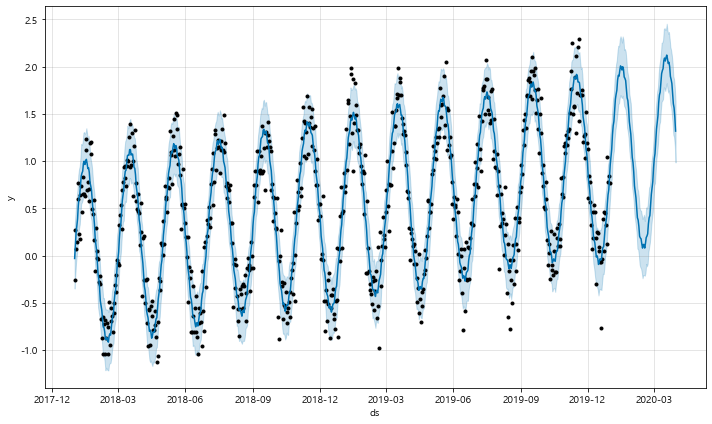

In [97]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=90)
forcast = m.predict(future)

m.plot(forcast);

---


In [39]:
np.arange(0, 10, 2)
# import set_matplotlib_hangul

array([0, 2, 4, 6, 8])

## 시계열 데이터 실전 분석
- https://pinkwink.kr/

In [98]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

%matplotlib inline

In [101]:
pinkwink_web = pd.read_csv(
    "../data/05_PinkWink_Web_Traffic.csv",
    encoding = "utf-8",
    thousands = ",",
    names = ["date", "traffic"],
    index_col=0
)
pinkwink_web = pinkwink_web[pinkwink_web["traffic"].notnull()]
pinkwink_web.tail()

,traffic
date,
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0
17. 6. 29.,1328.0
17. 6. 30.,1193.0


365


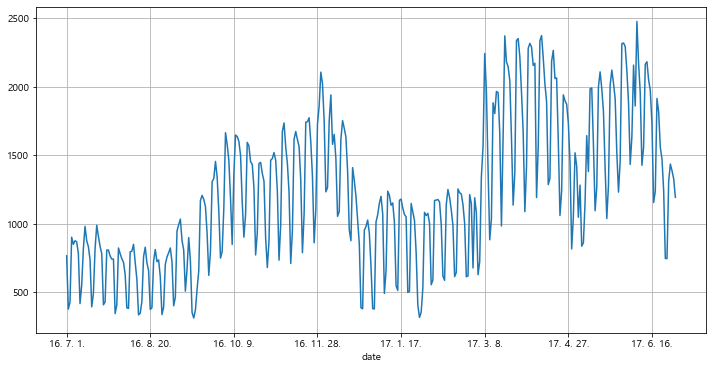

In [104]:
# 전체 데이터 그려보기
print(len(pinkwink_web))
pinkwink_web["traffic"].plot(figsize=(12,6), grid=True);

In [113]:
# Trend 분석을 시각화하기 위한 x 값 만들기
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web["traffic"].values
fx = np.linspace(0, time[-1], 10000)

In [114]:
# 에러를 계산할 함수
# np.sqrt() 는 제곱근 함수

def error(f, x, y):
    # 예측값과 실제 데이터를 뺄셈한 것에대한 제곱의 평균을 제곱근을 통해 값을 반환
    return np.sqrt(np.mean((f(x) - y) ** 2))

In [115]:
f1p = np.polyfit(time, traffic, 1)
f1 = np.poly1d(f1p)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [116]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


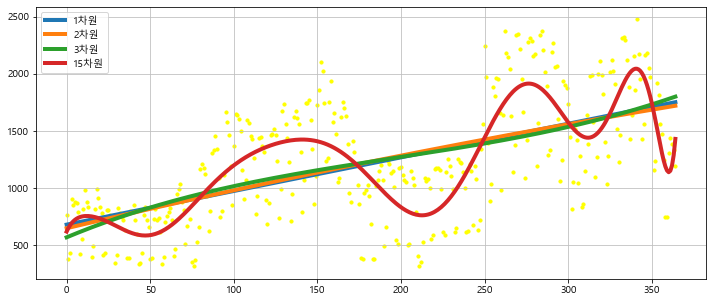

In [118]:
plt.figure(figsize=(12, 5))
plt.scatter(time, traffic, s=10, c="Yellow")
plt.plot(time, f1(time), lw=4, label="1차원")
plt.plot(time, f2(time), lw=4, label="2차원")
plt.plot(time, f3(time), lw=4, label="3차원")
plt.plot(time, f15(time), lw=4, label="15차원")
plt.legend()
plt.grid(True, linestyle="-", color="0.75")
plt.show()

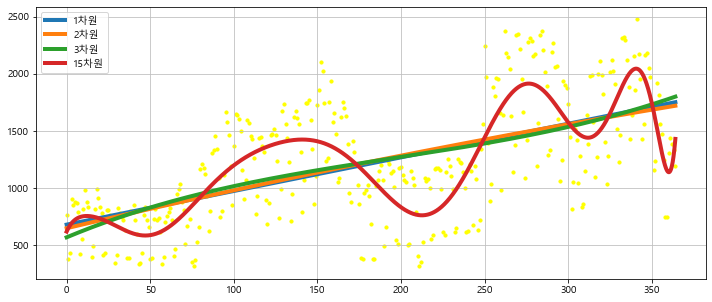

In [119]:
plt.figure(figsize=(12, 5))
plt.scatter(time, traffic, s=10, c="Yellow")
plt.plot(fx, f1(fx), lw=4, label="1차원")
plt.plot(fx, f2(fx), lw=4, label="2차원")
plt.plot(fx, f3(fx), lw=4, label="3차원")
plt.plot(fx, f15(fx), lw=4, label="15차원")
plt.legend()
plt.grid(True, linestyle="-", color="0.75")
plt.show()

In [123]:
df = pd.DataFrame({
    "ds":pinkwink_web.index, "y":pinkwink_web["traffic"]
})
df.reset_index(inplace=True)

df["ds"] = pd.to_datetime(df["date"], format="%y. %m. %d.")
df.tail()

,date,ds,y
360,17. 6. 26.,2017-06-26,1309.0
361,17. 6. 27.,2017-06-27,1436.0
362,17. 6. 28.,2017-06-28,1387.0
363,17. 6. 29.,2017-06-29,1328.0
364,17. 6. 30.,2017-06-30,1193.0


In [124]:
del df["date"]
df.tail()

,ds,y
360,2017-06-26,1309.0
361,2017-06-27,1436.0
362,2017-06-28,1387.0
363,2017-06-29,1328.0
364,2017-06-30,1193.0


In [131]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [132]:
# 60일에 해당하는 데이터 예측
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [133]:
# 예측 결과는 상한/하한의 범위를 포함/해서 얻어진다.
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
420,2017-08-25,1166.464680,699.457432,1086.114613,1166.449935,1166.477344,-269.888108,-269.888108,-269.888108,241.465995,...,-51.503692,-51.503692,-51.503692,-459.850411,-459.850411,-459.850411,0.0,0.0,0.0,896.576571
421,2017-08-26,1167.276383,278.089619,685.799735,1167.261311,1167.289386,-685.731971,-685.731971,-685.731971,241.465995,...,-467.504111,-467.504111,-467.504111,-459.693855,-459.693855,-459.693855,0.0,0.0,0.0,481.544412
422,2017-08-27,1168.088087,409.107351,831.932539,1168.072516,1168.101384,-553.876086,-553.876086,-553.876086,241.465995,...,-335.342351,-335.342351,-335.342351,-459.999730,-459.999730,-459.999730,0.0,0.0,0.0,614.212001
423,2017-08-28,1168.899790,969.219267,1391.158538,1168.884042,1168.913473,-1.933583,-1.933583,-1.933583,241.465995,...,217.283657,217.283657,217.283657,-460.683235,-460.683235,-460.683235,0.0,0.0,0.0,1166.966207
424,2017-08-29,1169.711494,988.250960,1410.825002,1169.695352,1169.725596,33.288662,33.288662,33.288662,241.465995,...,253.456750,253.456750,253.456750,-461.634083,-461.634083,-461.634083,0.0,0.0,0.0,1203.000155


In [129]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2016-07-01,736.705437,531.936770,939.584400
1,2016-07-02,304.971834,96.976403,503.144383
2,2016-07-03,424.491793,212.975441,635.007725
3,2016-07-04,967.352866,746.849193,1184.180845
4,2016-07-05,996.380798,795.860856,1214.252707
...,...,...,...,...
420,2017-08-25,896.576571,694.930512,1103.026074
421,2017-08-26,481.544412,266.504457,705.036708
422,2017-08-27,614.212001,410.085172,825.142746
423,2017-08-28,1166.966207,966.313528,1379.310534


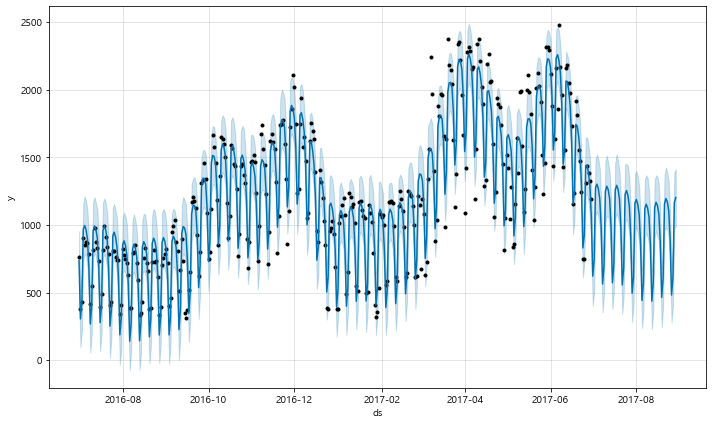

In [135]:
m.plot(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]);

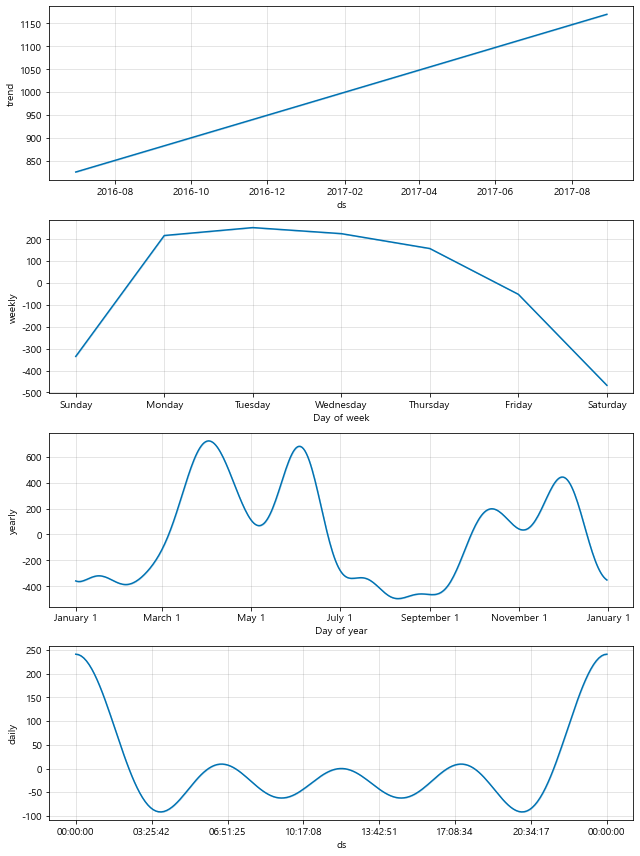

In [78]:
m.plot_components(forecast);

---

## 4. 주식 데이터 fbprophet으로 분석하기

#### 1. yahoo finance
- https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1

In [156]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
from fake_useragent import UserAgent

ua = UserAgent(verify_ssl=False)
user_agent = ua.random

url = "https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1"
req = Request(url, headers={"User-Agent":user_agent})
page = urlopen(req).read()
soup = BeautifulSoup(page, "html.parser")         
table = soup.find("table", class_="W(100%) M(0)")
df_raw = pd.read_html(str(table))[0]
df_raw.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
96,"May 20, 2021",351500.00,355000.00,348500.00,351000.00,351000.00,561151
97,"May 18, 2021",347000.00,349500.00,345000.00,349500.00,349500.00,445015
98,"May 17, 2021",345500.00,349000.00,341000.00,344000.00,344000.00,453316
99,"May 14, 2021",338000.00,344500.00,337500.00,342500.00,342500.00,460390
100,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...


In [159]:
# fbprophet 을 사용하는 형식에 맞춰준 뒤, 맨 마지막 NaN 값은 제외
df_tmp = pd.DataFrame({
    "ds":df_raw["Date"], "y":df_raw["Close*"]
})
df_target = df_tmp[:-1]
df_target.tail()

,ds,y
95,"May 21, 2021",360000.00
96,"May 20, 2021",351000.00
97,"May 18, 2021",349500.00
98,"May 17, 2021",344000.00
99,"May 14, 2021",342500.00


In [160]:
df = df_target.copy()
df["ds"] = pd.to_datetime(df["ds"], format="%b %d, %Y")

In [161]:
df.head()

,ds,y
0,2021-10-08,388500.00
1,2021-10-07,393500.00
2,2021-10-06,373000.00
3,2021-10-05,370500.00
4,2021-10-01,382000.00


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [164]:
df["y"] = df["y"].astype("float")

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [166]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)


In [167]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
125,2021-11-03,435819.774712,424395.878565,447146.310566
126,2021-11-04,440183.547603,429171.781882,452219.171837
127,2021-11-05,443571.834845,432201.465627,455085.735802
128,2021-11-06,441912.178215,431846.574915,453943.617396
129,2021-11-07,444030.247793,432897.474342,455133.586330


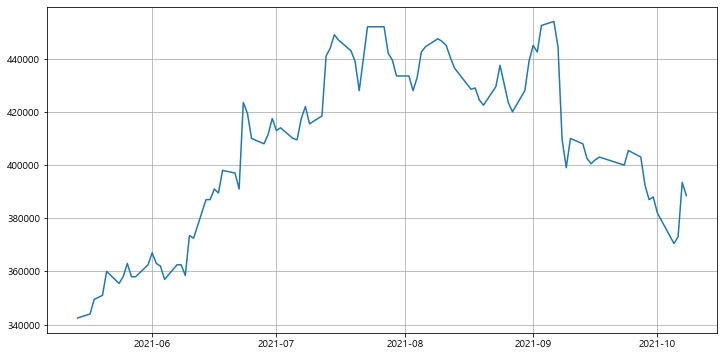

In [168]:
plt.figure(figsize=(12,6))
plt.plot(df["ds"], df["y"], label="real")
plt.grid(True)
plt.show()

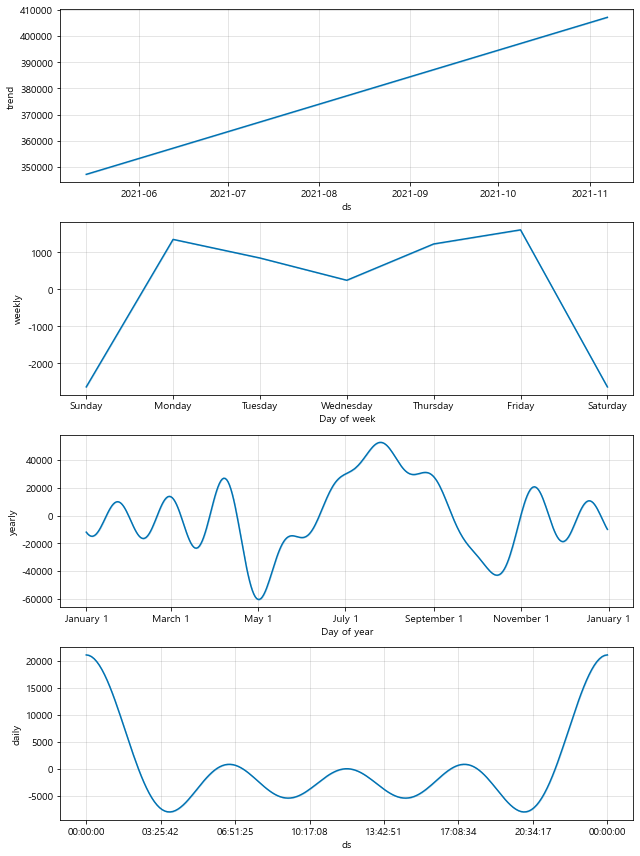

In [169]:
m.plot_components(forecast);

#### 2. KIA 주가 데이터 분석
- pip install yfinace

In [291]:
import yfinance as yf
from pandas_datareader import data

yf.pdr_override()

start_date = "2010-03-01"
end_date = "2018-02-28"
kia = data.get_data_yahoo("000270.KS", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [255]:
kia.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,17800.662109,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,18248.732422,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,18330.201172,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,18533.871094,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,18574.605469,4326618


In [256]:
len(kia)

1972

<AxesSubplot:xlabel='Date'>

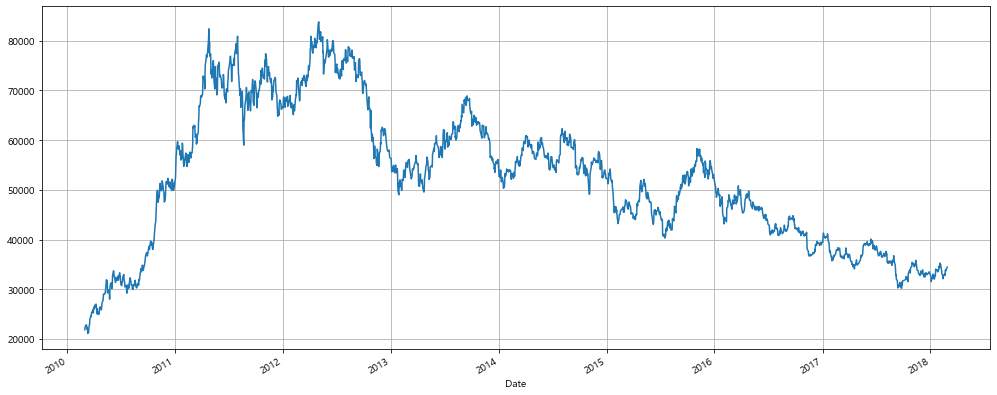

In [257]:
kia["Close"].plot(figsize=(17,7), grid=True)

In [258]:
# accuracy 확인을 위한 데이터
kia_trunc = kia[:"2017-08-30"]
kia_trunc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,17800.662109,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,18248.732422,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,18330.201172,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,18533.871094,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,18574.605469,4326618


In [259]:
# forecast를 위한 준비
df = pd.DataFrame({
    "ds":kia_trunc.index,
    "y":kia_trunc["Close"]
})
df.reset_index(inplace=True)
del df["Date"]
df.head()

,ds,y
0,2010-03-02,21850.0
1,2010-03-03,22400.0
2,2010-03-04,22500.0
3,2010-03-05,22750.0
4,2010-03-08,22800.0


In [260]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [261]:
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

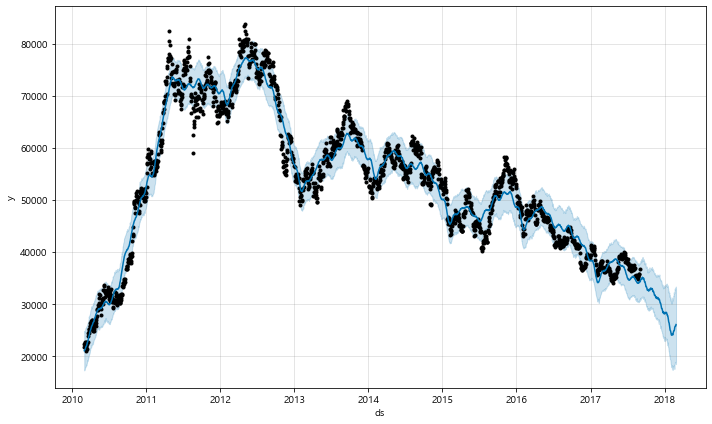

In [262]:
m.plot(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]);

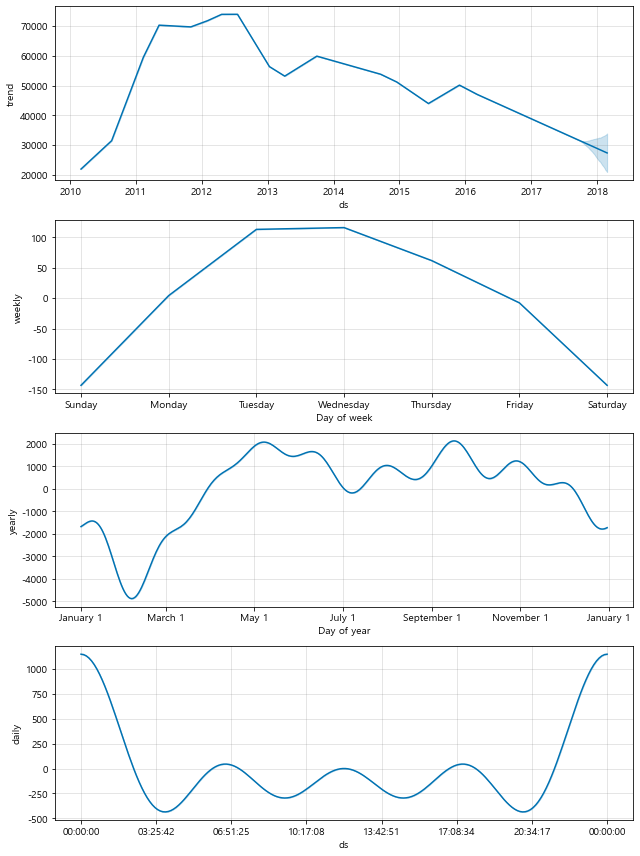

In [263]:
m.plot_components(forecast);

In [264]:
kia["Close"]

Date
2010-03-02    21850.0
2010-03-03    22400.0
2010-03-04    22500.0
2010-03-05    22750.0
2010-03-08    22800.0
               ...   
2018-02-21    33850.0
2018-02-22    33650.0
2018-02-23    34000.0
2018-02-26    34200.0
2018-02-27    34450.0
Name: Close, Length: 1972, dtype: float64

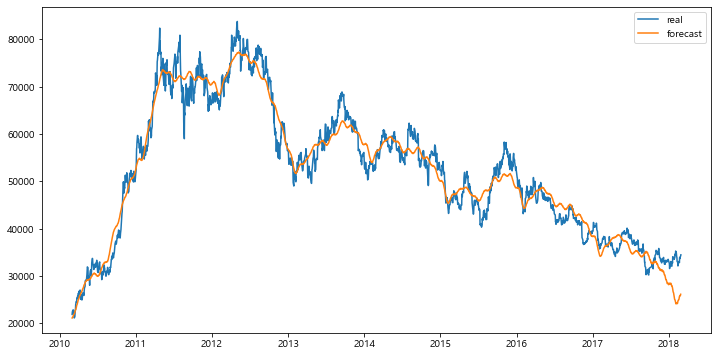

In [265]:
plt.figure(figsize=(12,6))
plt.plot(kia.index, kia["Close"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.legend()
plt.show()

#### 3. 대한항공 주식 데이터 예측
- 003490 대한항공

In [266]:
start_date = "2010-03-01"
end_date = "2018-02-28"
korea_air = data.get_data_yahoo("003490.KS", start_date, end_date)
korea_air.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,58192.625000,59390.417969,58192.625000,59390.417969,58454.984375,303805
2010-03-03,59090.968750,59490.230469,58691.707031,59190.785156,58258.496094,189214
2010-03-04,58991.152344,60188.941406,58891.335938,59290.601562,58356.738281,357038
2010-03-05,59290.601562,61087.285156,59290.601562,60588.207031,59633.906250,782451
2010-03-08,61286.917969,63083.601562,61087.285156,62784.152344,61795.265625,945708


<AxesSubplot:xlabel='Date'>

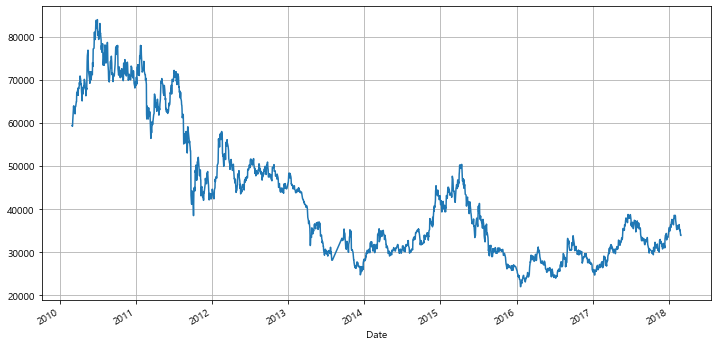

In [268]:
korea_air["Close"].plot(figsize=(12,6), grid=True)

In [270]:
# accuracy 데이터 분리
korea_air_trunc = korea_air[:"2017-11-30"]
korea_air_trunc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,58192.625000,59390.417969,58192.625000,59390.417969,58454.984375,303805
2010-03-03,59090.968750,59490.230469,58691.707031,59190.785156,58258.496094,189214
2010-03-04,58991.152344,60188.941406,58891.335938,59290.601562,58356.738281,357038
2010-03-05,59290.601562,61087.285156,59290.601562,60588.207031,59633.906250,782451
2010-03-08,61286.917969,63083.601562,61087.285156,62784.152344,61795.265625,945708


In [275]:
# forecast 를 위한 데이터 준비
df = pd.DataFrame({
    "ds":korea_air_trunc.index,
    "y":korea_air_trunc["Close"]
})

In [277]:
df.reset_index(inplace=True)
del df["Date"]

In [278]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-03-02,60107.234448,61285.783102,69277.303403,60107.234448,60107.234448,5256.241190,5256.241190,5256.241190,5410.286331,...,222.214637,222.214637,222.214637,-376.259777,-376.259777,-376.259777,0.0,0.0,0.0,65363.475639
1,2010-03-03,60174.329052,61542.707062,69247.144068,60174.329052,60174.329052,5208.441716,5208.441716,5208.441716,5410.286331,...,240.574709,240.574709,240.574709,-442.419324,-442.419324,-442.419324,0.0,0.0,0.0,65382.770769
2,2010-03-04,60241.423657,61643.792483,69333.190763,60241.423657,60241.423657,5209.014555,5209.014555,5209.014555,5410.286331,...,294.249434,294.249434,294.249434,-495.521210,-495.521210,-495.521210,0.0,0.0,0.0,65450.438211
3,2010-03-05,60308.518261,61502.598312,69529.310033,60308.518261,60308.518261,5180.080943,5180.080943,5180.080943,5410.286331,...,304.173243,304.173243,304.173243,-534.378631,-534.378631,-534.378631,0.0,0.0,0.0,65488.599204
4,2010-03-08,60509.802073,61603.203355,69402.320920,60509.802073,60509.802073,5144.728185,5144.728185,5144.728185,5410.286331,...,291.359597,291.359597,291.359597,-556.917743,-556.917743,-556.917743,0.0,0.0,0.0,65654.530258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,2018-02-24,29999.033975,30827.171086,39165.393773,28788.061895,31304.907637,4942.974504,4942.974504,4942.974504,5410.286331,...,-676.285816,-676.285816,-676.285816,208.973990,208.973990,208.973990,0.0,0.0,0.0,34942.008480
1971,2018-02-25,30013.534546,30449.632257,38935.133270,28777.370495,31320.240188,4831.610674,4831.610674,4831.610674,5410.286331,...,-676.285804,-676.285804,-676.285804,97.610148,97.610148,97.610148,0.0,0.0,0.0,34845.145220
1972,2018-02-26,30028.035117,31334.511018,40282.782940,28769.347418,31345.096654,5691.022082,5691.022082,5691.022082,5410.286331,...,291.359597,291.359597,291.359597,-10.623845,-10.623845,-10.623845,0.0,0.0,0.0,35719.057199
1973,2018-02-27,30042.535687,31340.688143,39922.880696,28750.195155,31377.384237,5518.602744,5518.602744,5518.602744,5410.286331,...,222.214637,222.214637,222.214637,-113.898223,-113.898223,-113.898223,0.0,0.0,0.0,35561.138431


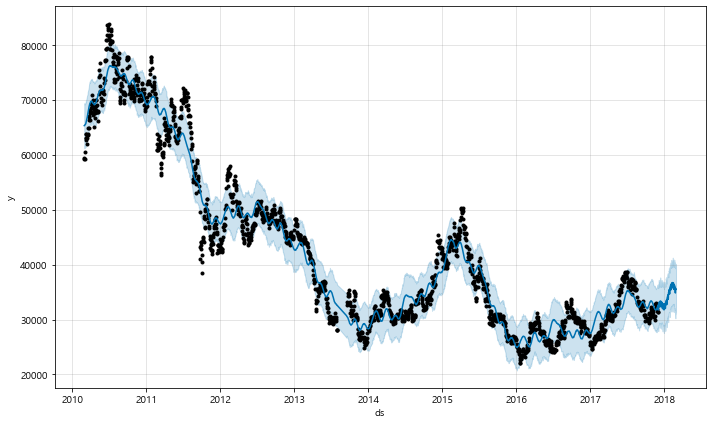

In [274]:
m.plot(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]);

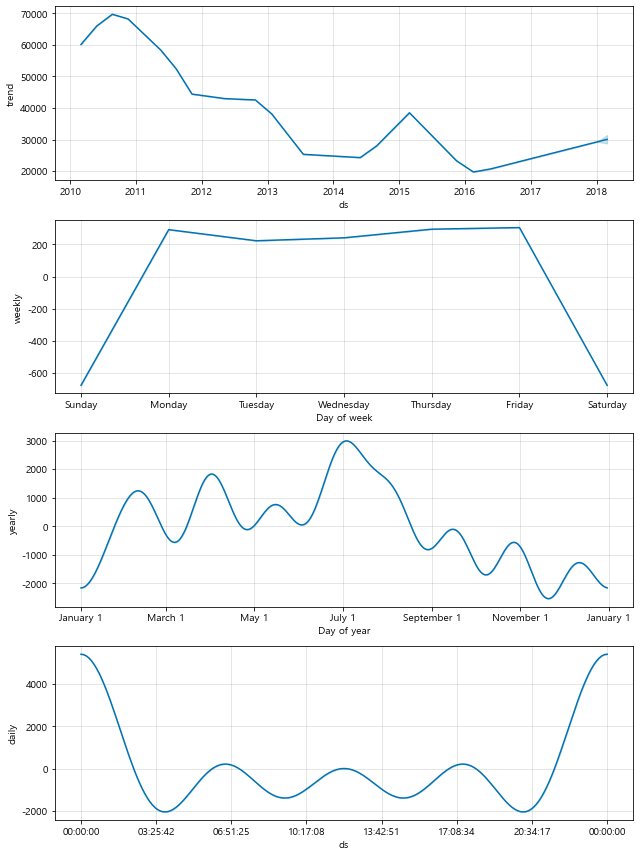

In [282]:
m.plot_components(forecast);

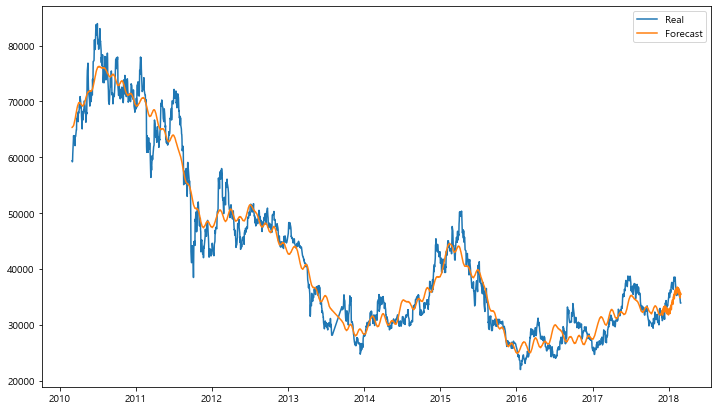

In [285]:
# 실제와 예측값 비교 그래프
plt.figure(figsize=(12, 7))
plt.plot(korea_air.index, korea_air["Close"], label="Real")
plt.plot(forecast["ds"], forecast["yhat"], label="Forecast")
plt.legend()
plt.show()

#### 4. 조금 특이한 형태의 데이터에 대한 forecast

In [286]:
# Logistic 성장형 그래프를 가진 데이터에 대한 forecast

df = pd.read_csv("../data/05_example_wp_R2.csv", index_col=0)
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


<AxesSubplot:>

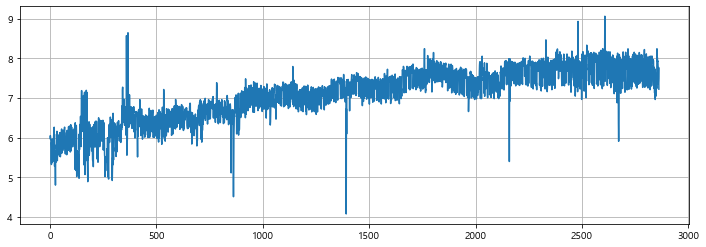

In [287]:
df["y"].plot(figsize=(12,4), grid=True)

In [315]:
df["cap"] = 8.5
df["floor"] = 5.0
df.tail()

,ds,y,cap,floor
2858,2015-12-11,7.834788,8.5,5.0
2859,2015-12-12,7.360104,8.5,5.0
2860,2015-12-13,7.479864,8.5,5.0
2861,2015-12-18,7.765145,8.5,5.0
2862,2015-12-19,7.220374,8.5,5.0


In [316]:
m = Prophet(growth="logistic", daily_seasonality=True)
m.fit(df);

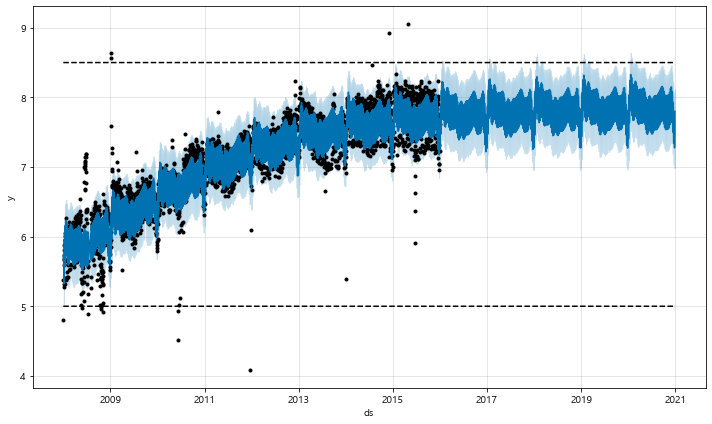

In [317]:
future = m.make_future_dataframe(periods=1826)
future["cap"] = 8.5
future["floor"] = 5.0
forecast = m.predict(future)
m.plot(forecast);

#### KIA 개인 분석

In [305]:
import yfinance as yf
from pandas_datareader import data

yf.pdr_override()

start_date = "2015-03-01"
end_date = "2021-09-28"
kia = data.get_data_yahoo("005380.KS", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

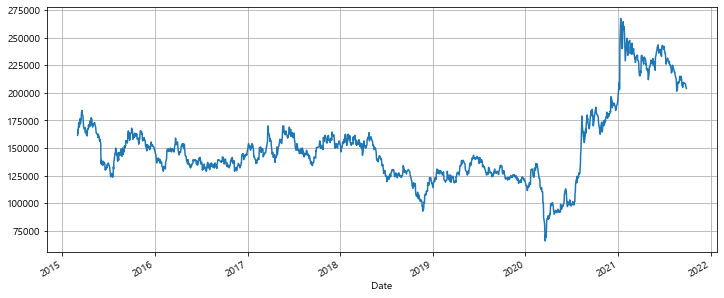

In [306]:
kia["Close"].plot(grid=True, figsize=(12, 5))